In [1]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
animedata = pd.read_csv('animeTV_MachineLearning.csv')
animedata.head()

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
0,8521,21743,Donten ni Warau,800,"Action, Historical, Shoujo, Supernatural",Laughing Under the Clouds,曇天に笑う,TV,12,"Oct 4, 2014 to Dec 20, 2014",...,1,0,0,0,0,0,0,0,0,0
1,2988,3372,RGB Adventure,0,Adventure,RGB Adventure,RGBアドベンチャ,TV,6,"Nov 19, 2006 to Dec 24, 2006",...,0,0,0,0,0,0,0,1,0,0
2,5765,9424,Seupideuwang Beongae,700,"Action, Game, School, Shounen, Sports",Wings of Dragon,스피드왕 번개,TV,26,"May 18, 1998 to Aug 18, 1998",...,0,0,0,0,0,0,0,1,0,0
3,1675,1839,Jagainu-kun,700,"Adventure, Fantasy, Kids, Shoujo, Slice of Life",Unknown,じゃがいぬくん,TV,26,"Apr 4, 2004 to Jul 18, 2004",...,0,0,0,0,0,0,0,1,0,0
4,11462,32670,Battle Spirits: Double Drive,600,"Game, Fantasy",Unknown,バトルスピリッツ ダブルドライブ,TV,51,"Apr 6, 2016 to Mar 29, 2017",...,0,0,0,0,0,0,0,0,0,0


# Machine Learning



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5986301369863014

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.546448087431694



Accuracy 	Train Dataset
True Positive Rate 	: 26.801152737752158
False Positive Rate 	: 10.182767624020887
Accuracy 	Test Dataset
True Positive Rate 	: 22.82608695652174
False Positive Rate 	: 13.186813186813188


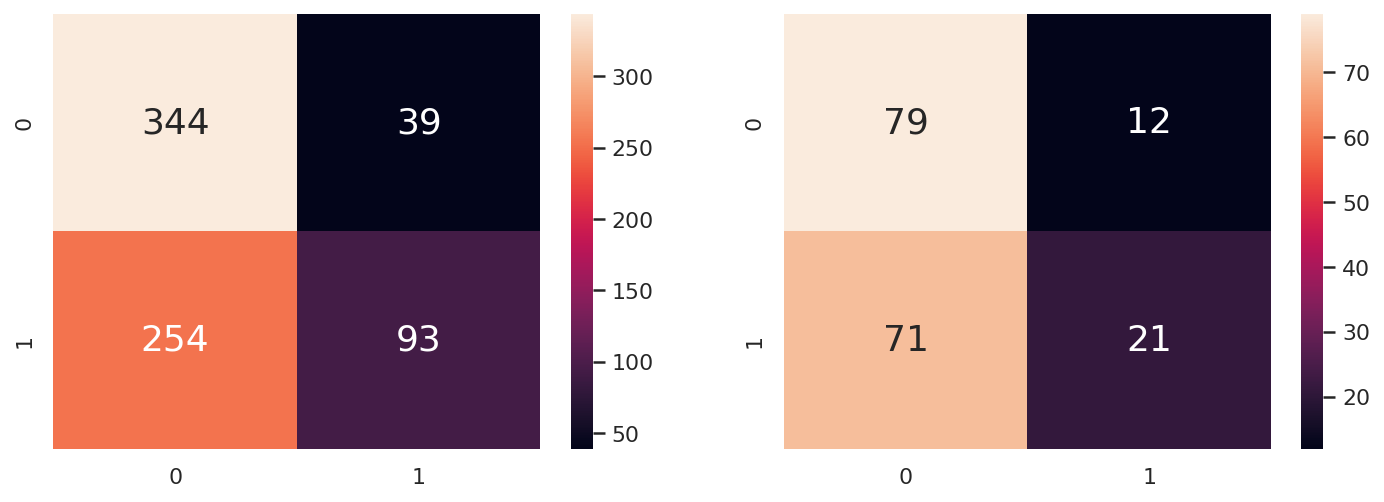

In [3]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Extract Response and Predictors
SP = pd.DataFrame(animedata[["Score", "Ranked", "isManga"]])   # Predictors
HS = pd.DataFrame(animedata['HasSequel'])    # Response

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SP, HS, test_size = 0.20, train_size = 0.80)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

cm = metrics.confusion_matrix(y_train, y_train_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTrain Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

cm = metrics.confusion_matrix(y_test, y_test_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTest Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

[Text(0.5, 0.8333333333333334, 'Ranked <= 1345.0\ngini = 0.499\nsamples = 730\nvalue = [383, 347]\nclass = Sequel'),
 Text(0.25, 0.5, 'Score <= 400.0\ngini = 0.443\nsamples = 139\nvalue = [46, 93]\nclass = No Sequel'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Sequel'),
 Text(0.375, 0.16666666666666666, 'gini = 0.416\nsamples = 132\nvalue = [39, 93]\nclass = No Sequel'),
 Text(0.75, 0.5, 'Ranked <= 4091.5\ngini = 0.49\nsamples = 591\nvalue = [337, 254]\nclass = Sequel'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 193\nvalue = [100, 93]\nclass = Sequel'),
 Text(0.875, 0.16666666666666666, 'gini = 0.482\nsamples = 398\nvalue = [237, 161]\nclass = Sequel')]

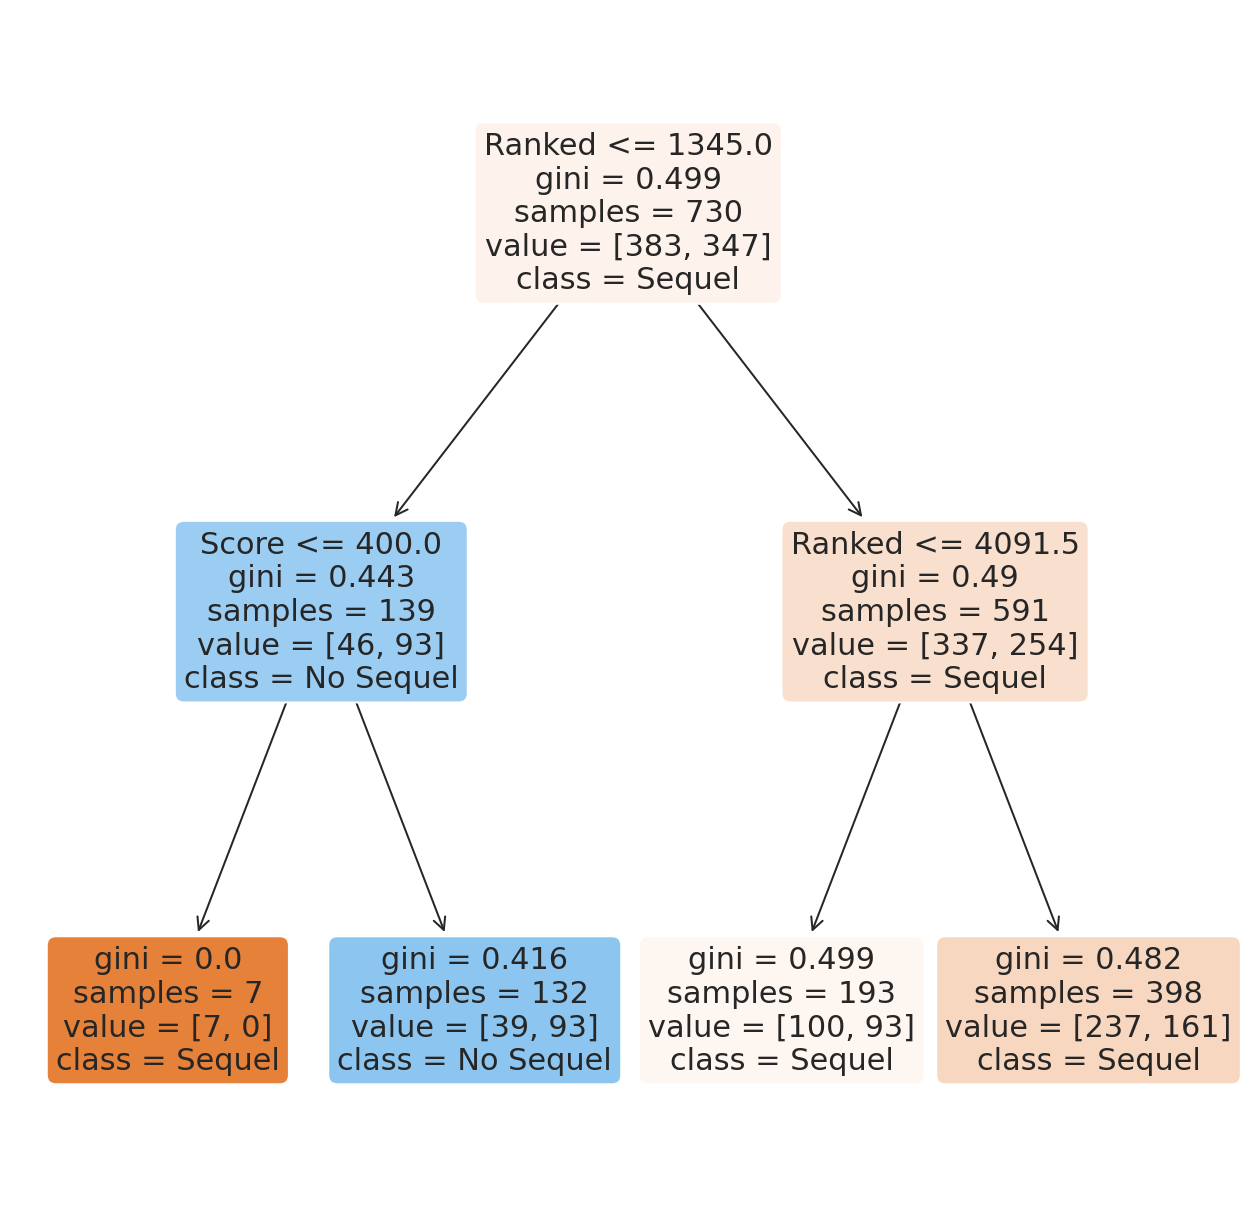

In [4]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(11,11))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Sequel","No Sequel"])